<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
## <font color='navy'> SIMULACIÓN DE PROCESOS FINANCIEROS   

**Nombres:** 
José Antonio Contreras Peña y Jesús Sebastian Gonzalez Ortiz 

**Fecha:** 14 de octubre del 2021.

**Expediente** : 721860 y 721621.

**Profesor:** Oscar David Jaramillo Zuluaga.

**Enlace Github:** https://github.com/Jancope/ProyectoModulo1

## Definición de Proyecto  Clase: 12

# Tema: *Simulación de ventas de Rappi*

### Objetivos

   ### 1.1 Objetivo general
   - Analizar y determinar la disposición de pago de clientes por pedido.
    
   ### 1.2 Objetivos específicos
   - Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.
   - Proyectar la categoría de pedidos más popular de la plataforma.
   - Encontrar rangos de gasto total promedio por pedido.
   - Determinar la cantidad de pago por tarifa de entrega que hacen los usuarios.

### Definición del problema

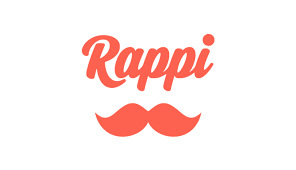

Las empresas que ofrecen el servicio a domicilio han ido en auge tomando cada vez más importancia dentro de la sociedad, desde favores y encargos hasta el servicio a domicilio de alimentos, Rappi es uno de los grandes exponentes de esta industria y ha asentado bases dentro de la sociedad que hasta el día de hoy su aplicación se ha vuelto indispensable para muchas personas. 

Uno de los grandes problemas de pueden afrontar dichas empresas son sus tarifas de entrega que, además del precio de la compra o favor que se encarga, es un costo extra que los clientes tienen muy presentes y pueden ser lo que define si un cliente hace el encargo o no.

Para la investigación se debe tener en cuenta que los datos recopilados son de Bogotá, Colombia y están enfocados en el servicio a domicilio de alimentos en este caso. Se sabe Rappi no es la única aplicación de servicios a domicilio en el mercado, es una de las principales, pero siempre que haya una mejor oferta o una menor tarifa de entrega por el mismo producto en otra aplicación, obviamente significaría que no usarán Rappi.

Para determinar las preferencias de cantidad de pagos por envío se tendrán en cuenta como variables el precio del pedido, costo del pedido, categoría del pedido y la relación precio-costo de envío que tienen los pedidos para tener unas simulaciones representativas del contexto.


In [1]:
from IPython.display import Image
Image("Diagrama.png")

### Nodos
   - Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos. Con esto se sabrá lo que la gente está dispuesta a pagar de envío dependiendo del costo de su pedido.
   - Encontrar las categorías donde la gente gasta más en envíos. Con esto se podrá determinar de entre tantas categorías de comida que ofrece el servicio, cúal es la más popular.
   - Encontrar rangos de gasto promedio por envío. Esto permite saber un aproximado de lo que la gente esta dispuesta a pagar por envío y la frecuencia con que se paga esa cantidad de envío.
   - Encontrar los rangos de costo total del pedido para determinar el promedio de gasto que tienen las personas al hacer un encargo.

### Variables
 - Tipo de comercio
 - Gasto de envío
 - Total Gastado
 - Porcentaje de gasto de envió de la compra

En el tipo de comercio se encuentran las categorías de alimentos que se encuentran dentro de la aplicación.

El gasto de envío es el precio total de la gente que pagó exclusivamente por la tarifa de entrega de su pedido.

Total gastado es la suma del precio de su pedido y de la tarifa de entrega, p sea, el total a pagar del cliente por su consumo y servicio de la aplicación.

El porcentaje de gasto de envío de la compra representa la cantidad en porcentaje que el usuario pagó de envío respecto al total de su compra.

### Hipótesis:
 - Habrá más volumen de pedidos si la tarifa de entrega es más barata que el promedio.
 - Las personas están dispuestas a pagar más de tarifa envío si la compra es mas grande.
 
### Supuestos:
 - La información obtenida es de la aplicación de servicios a domicilio y encargos de Rappi.
 - La información recopilada fue en el transcurso de 2 horas en la ciudad de Bogotá, Colombia. Por lo que la moneda que se maneja dentro del proyecto son pesos colombianos. (1 MXN ≈ 190 COP)
 - Las variables selectas son las que nos ayudarán a comprender mejor la situación.

### Obtención de base de datos

https://www.kaggle.com/alexbonella/sales-simulation-at-rappi

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  
import matplotlib.pyplot as plt
import scipy.stats as st     
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import warnings
import statsmodels as sm 
import matplotlib 
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm 
from sklearn.model_selection import GridSearchCV
from statistics import mode
from statistics import mean
import statistics


### Base de datos

In [3]:
data = pd.read_csv('Sales_simulation.csv')
data.head()

,Unnamed: 0,purchase_ID,Date at created,Category,Name,Purchase Price,Delivery Price,Total
0,0,1,21-10-2020 14:42:55.373979,Saludable · Desayunos,Distrito Gourmet,10700,3700,14400
1,1,2,21-10-2020 14:42:55.483563,Postres,Toledo Pastelería,53900,6800,60700
2,2,3,21-10-2020 14:42:55.739536,Postres · Helados,Mahé,7500,6000,13500
3,3,4,21-10-2020 14:42:55.945560,Hamburguesas · Saludable,Restaurant Inn,23000,6100,29100
4,4,5,21-10-2020 14:42:56.201561,Postres · Desayunos,Maria Luisa - Postres,9000,4300,13300


In [4]:
data = data.drop(["Unnamed: 0"], axis=1)
data = data.drop(["purchase_ID"], axis=1)
data = data.drop(["Date at created"], axis=1)
data = data.drop(["Name"], axis=1)
data.head()

,Category,Purchase Price,Delivery Price,Total
0,Saludable · Desayunos,10700,3700,14400
1,Postres,53900,6800,60700
2,Postres · Helados,7500,6000,13500
3,Hamburguesas · Saludable,23000,6100,29100
4,Postres · Desayunos,9000,4300,13300


Se eliminaron columnas de datos basura de la base de datos.

In [5]:
data["Porcentaje"] = (data["Delivery Price"] / data["Total"])*100
data.head()

,Category,Purchase Price,Delivery Price,Total,Porcentaje
0,Saludable · Desayunos,10700,3700,14400,25.694444
1,Postres,53900,6800,60700,11.202636
2,Postres · Helados,7500,6000,13500,44.444444
3,Hamburguesas · Saludable,23000,6100,29100,20.962199
4,Postres · Desayunos,9000,4300,13300,32.330827


Filtramos las variables que se iban a requerir para este proyecto y además agregamos la variable de "Porcentaje" que representa el porcentaje de costo que tiene el envío sobre el total del pedido.

## Nodo 1
- Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.

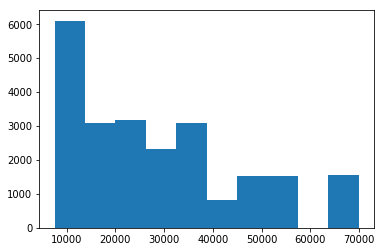

In [6]:
plt.hist(data["Purchase Price"], bins = 10)
plt.show()

In [7]:
media = mean(data["Purchase Price"])
minima = min(data["Purchase Price"])
maxima = max(data["Purchase Price"])

print("El promedio de precio de compras por pedido es de $", media)
print("La mínima compra afectuada fue de $", minima)
print("La máxima compra realizada fue de $", maxima)

El promedio de precio de compras por pedido es de $ 28588.240206629358
La mínima compra afectuada fue de $ 7500
La máxima compra realizada fue de $ 70000


Como se puede observar en el histograma la categoría que ronda los $10,000 pesos es la que tiene más pedidos efectuados, y a medida que el precio va subiendo cada vez hay menos pedidos.

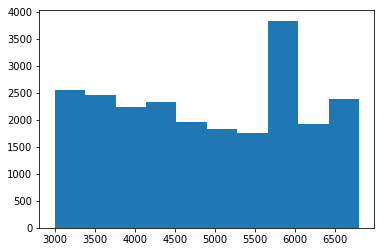

In [8]:
plt.hist(data["Delivery Price"], bins = 10)
plt.show()

In [9]:
media = mean(data["Delivery Price"])
minima = min(data["Delivery Price"])
maxima = max(data["Delivery Price"])

print("El promedio de precio de encargo por pedido es de $", media)
print("El mínima precio de encargo fue de $", minima)
print("El máximo precio de encargo fue de $", maxima)

El promedio de precio de encargo por pedido es de $ 4901.45071028842
El mínima precio de encargo fue de $ 3000
El máximo precio de encargo fue de $ 6800


El rango de costo de entrega a la que la gente esta dispuesta a pagar va desde los 3,000 pesos hasta los 6,800 pesos, mientras que el promedio del costo de entrega es de $4,900.

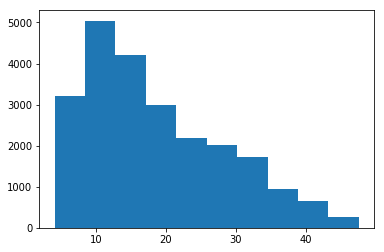

In [10]:
plt.hist(data["Porcentaje"], bins = 10)
plt.show()

In [11]:
media = mean(data["Porcentaje"])
minima = min(data["Porcentaje"])
maxima = max(data["Porcentaje"])


print("El promedio de porcentaje de gasto por pedido es de", media,"%")
print("El mínimo porcentaje de compra fue", minima,"%")
print("El máximo porcentaje de compra fue", maxima,"%")


El promedio de porcentaje de gasto por pedido es de 18.59462350164813 %
El mínimo porcentaje de compra fue 4.10958904109589 %
El máximo porcentaje de compra fue 47.55244755244755 %


Se puede observar que la gente en promedio paga hasta un 18%-19% del precio total de su pedido como tarifa de entrega.

In [12]:
mode(data["Category"])

'Postres · Desayunos'

La categoría de la que más pedidos se hacen es la de Postres y Desayunos.

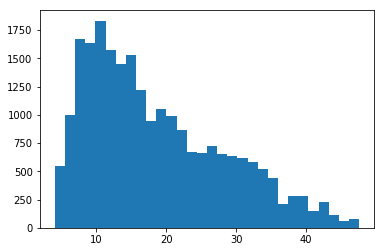

In [13]:
porcentaje = data["Porcentaje"]
plt.hist(porcentaje, bins = 30)
plt.show()

In [14]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.20.3
  scipy: 1.2.1
  statsmodels: 0.9.0


In [15]:
x_grid=np.linspace(0, 50, 100)

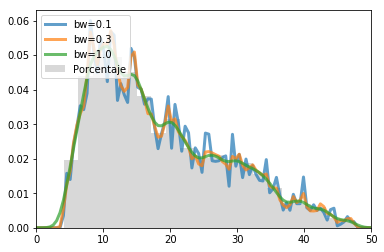

In [16]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(data["Porcentaje"], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(data["Porcentaje"], 20, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0, 50)
ax.legend(loc='upper left')

In [17]:
import seaborn as sns

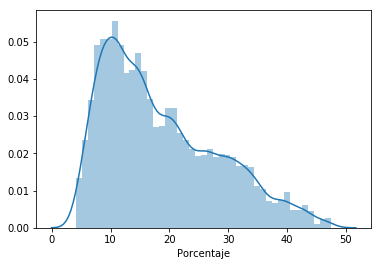

In [18]:
ax = sns.distplot(porcentaje)

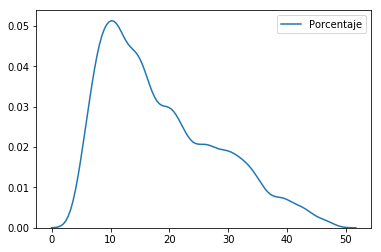

In [19]:
pron=sns.kdeplot(porcentaje)
pron

In [20]:
desvest=statistics.stdev(data["Porcentaje"])
print("mu =", media)
print("sigma =", desvest)

mu = 18.59462350164813
sigma = 9.782888708193019


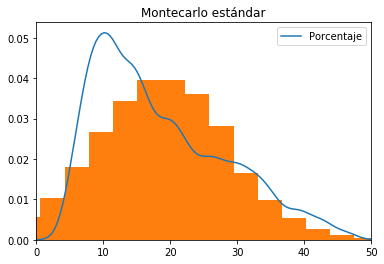

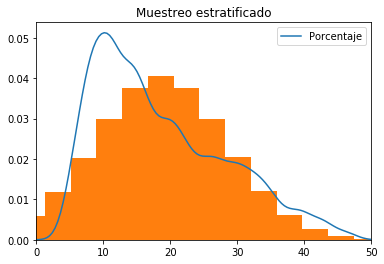

In [21]:
N = 10000
# (Método transformada inversa visto en clases pasadas) d.normal
mu = media
sigma = desvest


# Método montecarlo estándar para distribución normal
montecarlo_standar = st.norm(mu, sigma).ppf(np.random.rand(N))
sns.kdeplot(porcentaje)
plt.hist(montecarlo_standar,20,density=True)
plt.title('Montecarlo estándar')
plt.xlim((0, 50))
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(N)
m_estratificado = st.norm(mu, sigma).ppf((U2 + np.arange(0, B)) / B)
sns.kdeplot(porcentaje)
plt.hist(m_estratificado,20,density=True)
plt.title('Muestreo estratificado')
plt.xlim((0, 50))
plt.show()

Dadas las gráficas que representan los datos generados con montecarlo estándar y con el muestreo estratificado, se puede asegurar que existe cierta similitud a la distribución de datos reales. La cantidad de datos utilizados en la simulación fue de 10,000 lo que representa aproximadamente 1 hora del muestreo original que es de 2 horas.

In [22]:
print("Promedio de % de datos aleatorios:", montecarlo_standar.mean(),"%")
print("Promedio de % de datos reales:", porcentaje.mean(),"%")
confianza=.95
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(montecarlo_standar)-1, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Error entre medias real y aleatoria estimada
error = abs(np.array(porcentaje.mean() - montecarlo_standar.mean())/montecarlo_standar.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre porcentajes:', error,"%")

Promedio de % de datos aleatorios: 18.682155133424 %
Promedio de % de datos reales: 18.59462350164816 %
Con una confianza de 0.95 la media estará en el intervalo t,
 (18.49044131258385, 18.87386895426415)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (18.490464519220907, 18.873845747627094)
Error medio entre porcentajes: 0.468530697613346 %


In [23]:
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(m_estratificado)-1, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Error entre medias real y aleatoria estimada
error = abs(np.array(porcentaje.mean() - m_estratificado.mean())/m_estratificado.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre porcentajes:', error,"%")

Con una confianza de 0.95 la media estará en el intervalo t,
 (18.40234069360006, 18.785876175909564)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (18.40236390676408, 18.785852962745544)
Error medio entre porcentajes: 0.0027700542629236382 %


C:\Users\janco\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\janco\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\janco\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\janco\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\janco\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


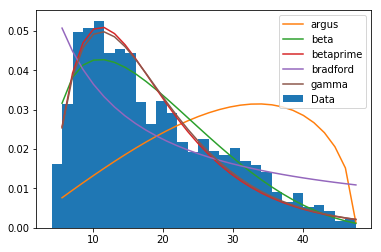

In [24]:
y, x ,_ = plt.hist(data['Porcentaje'], bins=29, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[3:7] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Porcentaje'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show();

### Nodo 2
   - Encontrar los rangos de costo total del pedido para determinar el promedio de gasto que tienen las personas al hacer un encargo.

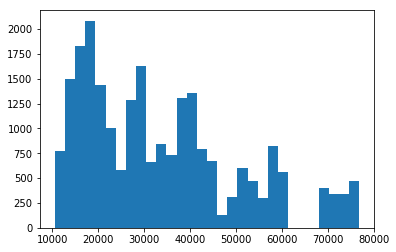

In [25]:
total = data["Total"]
plt.hist(total, bins = 30)
plt.show()

In [26]:
media_t = mean(data["Total"])
minima = min(data["Total"])
maxima = max(data["Total"])

print("El promedio de precio total por pedido fue de $", media_t)
print("El mínimo pedido recibido fue de $", minima)
print("El máximo pedido recibido fue de $", maxima)

El promedio de precio total por pedido fue de $ 33489.69091691778
El mínimo pedido recibido fue de $ 10500
El máximo pedido recibido fue de $ 76800


In [66]:
x_grid=np.linspace(0, 800, 100)

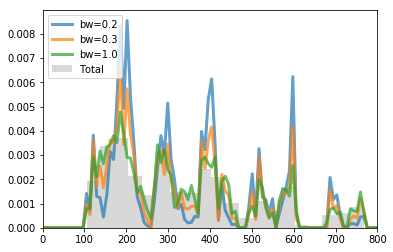

In [77]:
fig, ax = plt.subplots()
for bandwidth in [0.2, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(data["Total"]/100, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(data["Total"]/100, 20, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0, 800)
ax.legend(loc='upper left')

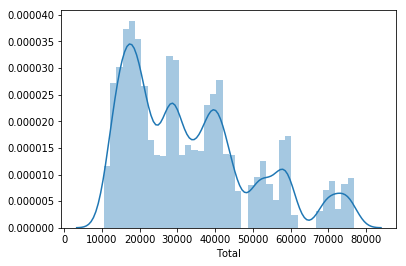

In [27]:
ax = sns.distplot(total)

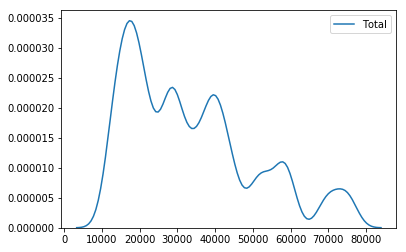

In [28]:
pron2 =sns.kdeplot(total)
pron2

In [29]:
desvest2 = statistics.stdev(total)
print("mu =", media_t)
print("sigma =", desvest2)

mu = 33489.69091691778
sigma = 16867.15924078914


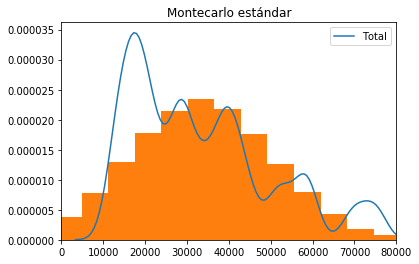

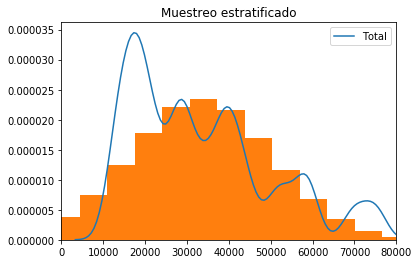

In [30]:
N = 10000
# (Método transformada inversa visto en clases pasadas) d.normal
mu = media_t
sigma = desvest2


# Método montecarlo estándar para distribución normal
montecarlo_standar = st.norm(mu, sigma).ppf(np.random.rand(N))
sns.kdeplot(total)
plt.hist(montecarlo_standar,20,density=True)
plt.title('Montecarlo estándar')
plt.xlim((0, 80000))
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(N)
m_estratificado = st.norm(mu, sigma).ppf((U2 + np.arange(0, B)) / B)
sns.kdeplot(total)
plt.hist(m_estratificado,20,density=True)
plt.title('Muestreo estratificado')
plt.xlim((0, 80000))
plt.show()

Hicimos simulaciones de 10,000 datos para representar aproximadamente la cantidad de pedidos que se iban a realizar en el lapso de 1 hora, la gráfica espectro azul del fondo representa las tendencias que tenían los datos originales y la naranja son las simulaciones de montecarlo estándar y el muestreo estratificado. Tiene cierta similitud en la distribución de densidad de pedidos realizados, pero aún se puede observar que no son muy precisas dichas gráficas resepcto a la distribución original.

In [31]:
print("Promedio de $ de datos aleatorios:", montecarlo_standar.mean())
print("Promedio de $ de datos reales:", total.mean())
confianza=.95
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(montecarlo_standar)-1, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Error entre medias real y aleatoria estimada
error = abs(np.array(total.mean() - montecarlo_standar.mean())/montecarlo_standar.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre promedios:', error,"%")

Promedio de $ de datos aleatorios: 33499.653688575665
Promedio de $ de datos reales: 33489.69091691778
Con una confianza de 0.95 la media estará en el intervalo t,
 (33166.91378424815, 33832.39359290318)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (33166.954061856515, 33832.353315294815)
Error medio entre promedios: 0.029739924330265576 %


In [32]:
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(m_estratificado)-1, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Error entre medias real y aleatoria estimada
error = abs(np.array(total.mean() - m_estratificado.mean())/m_estratificado.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre promedios:', error,"%")

Con una confianza de 0.95 la media estará en el intervalo t,
 (33158.05578851609, 33819.28251030429)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (33158.095808709935, 33819.242490110446)
Error medio entre promedios: 0.0030510842429490492 %


Analizando los datos se puede observar que con los datos estratratificados se muestra un error mucho menor que si se toman los datos generados con el método montecarlo.

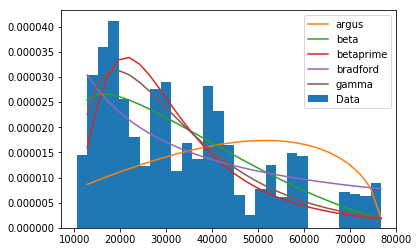

In [33]:
y, x ,_ = plt.hist(data['Total'], bins=29, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[3:7] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Total'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show();

### Conclusión